<font size = "5">**plot RPM, Speed, nGear, Throttle, Brake**<font>

"""
Created on Sun May 28 19:51:21 2023

@author: gakro
"""

this program is to predict the final position of each driver in the race.
thus, the output should be the position (ordinal data from 1 to 20).
the inputs (which parameters to use and which year, race, and session to use)
and the appropriate algorithms should be considered.

training set: Bahrain, Saudi Arabia, Australia, Azerbaijan (all in 2023)
test set: Miami (2023)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import fastf1
import fastf1.plotting
from fastf1 import Cache

all_drivers = ["ALB", "ALO", 
               "BOT", "RIC", 
               "GAS", "HAM", 
               "HUL", "LEC", 
               "MAG", "NOR", 
               "OCO", "PER", 
               "PIA", "RUS", 
               "SAI", "SAR", 
               "STR", "TSU", 
               "VER", "ZHO"]

The following funciton named fastestLapTelemetryComparison returns the lap comparison between multiple driver for their fastest lap in the quali. 
year, gp, and identifier are the year, gp and identifier in which the sesison was held. They can be numbers of strings. 
drivers is the array of driver abbreviations in strings, such as "VER". 
driver_colors is the array of driver names used to identify the color of the plotting using .driver_color funciton.

In [2]:
def fastestLapTelemetryComparison(session, session_name, attribute, drivers, driver_colors): 
    Cache.enable_cache("/Users/gakroppongi/Library")
    fastf1.plotting.setup_mpl()

    if(len(attribute) != 1):

        axis = np.array([None for i in range(len(attribute))])
        fig, (axis) = plt.subplots(nrows=len(axis), sharex=True, subplot_kw=dict(frameon=False))  
        plt.subplots_adjust(hspace=0.1)
    
        axis[-1].set_xlabel('Distance in m')

        for h in range(len(axis)):

            axis[h].set_ylabel(attribute[h])
            axis[h].grid()

        for i in range(len(drivers)):
            lap = session.laps.pick_driver(drivers[i]).pick_fastest()
            tel = lap.get_car_data().add_distance()
            color = fastf1.plotting.driver_color(driver_colors[i])

            for j in range(len(axis)):
                axis[j].plot(tel['Distance'], tel[attribute[j]], color=color, label=drivers[i])

            
        axis[-1].legend()
        plt.suptitle(f"Fastest Lap Comparison \n "f"{session.event['EventName']} {session.event.year} {session_name}")
        plt.figure().set_size_inches(50000, 500000, forward=True)
        fig.set_dpi(1000)

        plt.show()

    else:
        fig, (ax) = plt.subplots(nrows=1, sharex=True, subplot_kw=dict(frameon=False))  
        plt.subplots_adjust(hspace=0.1)
    
        ax.set_xlabel('Distance in m')

        ax.set_ylabel(attribute[0])
        ax.grid()

        for i in range(len(drivers)):
            lap = session.laps.pick_driver(drivers[i]).pick_fastest()
            tel = lap.get_car_data().add_distance()
            color = fastf1.plotting.driver_color(driver_colors[i])
            ax.plot(tel['Distance'], tel[attribute[0]], color=color, label=drivers[i])

            
        ax.legend()
        plt.suptitle(f"Fastest Lap Comparison \n "f"{session.event['EventName']} {session.event.year} {session_name}")
        plt.figure().set_size_inches(50000, 500000, forward=True)
        fig.set_dpi(1000)
        plt.savefig(f"Fastest Lap Comparison \n "f"{session.event['EventName']} {session.event.year} {session_name} \n{drivers}.png")
        plt.show()

lap = monaco_quali.laps.pick_driver("VER").pick_fastest()
tel = lap.get_car_data().add_distance()

now tel has the attributes below:
    'Date', 'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source', 'Time', 'SessionTime', 'Distance'

RPM, Speed, nGear, Throttle, Brake, DRS are useful data sets

In [5]:
session = fastf1.get_session(2023, "hungary", "Q")
session.load()

core           INFO 	Loading data for Hungarian Grand Prix - Qualifying [v3.0.7]
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data h

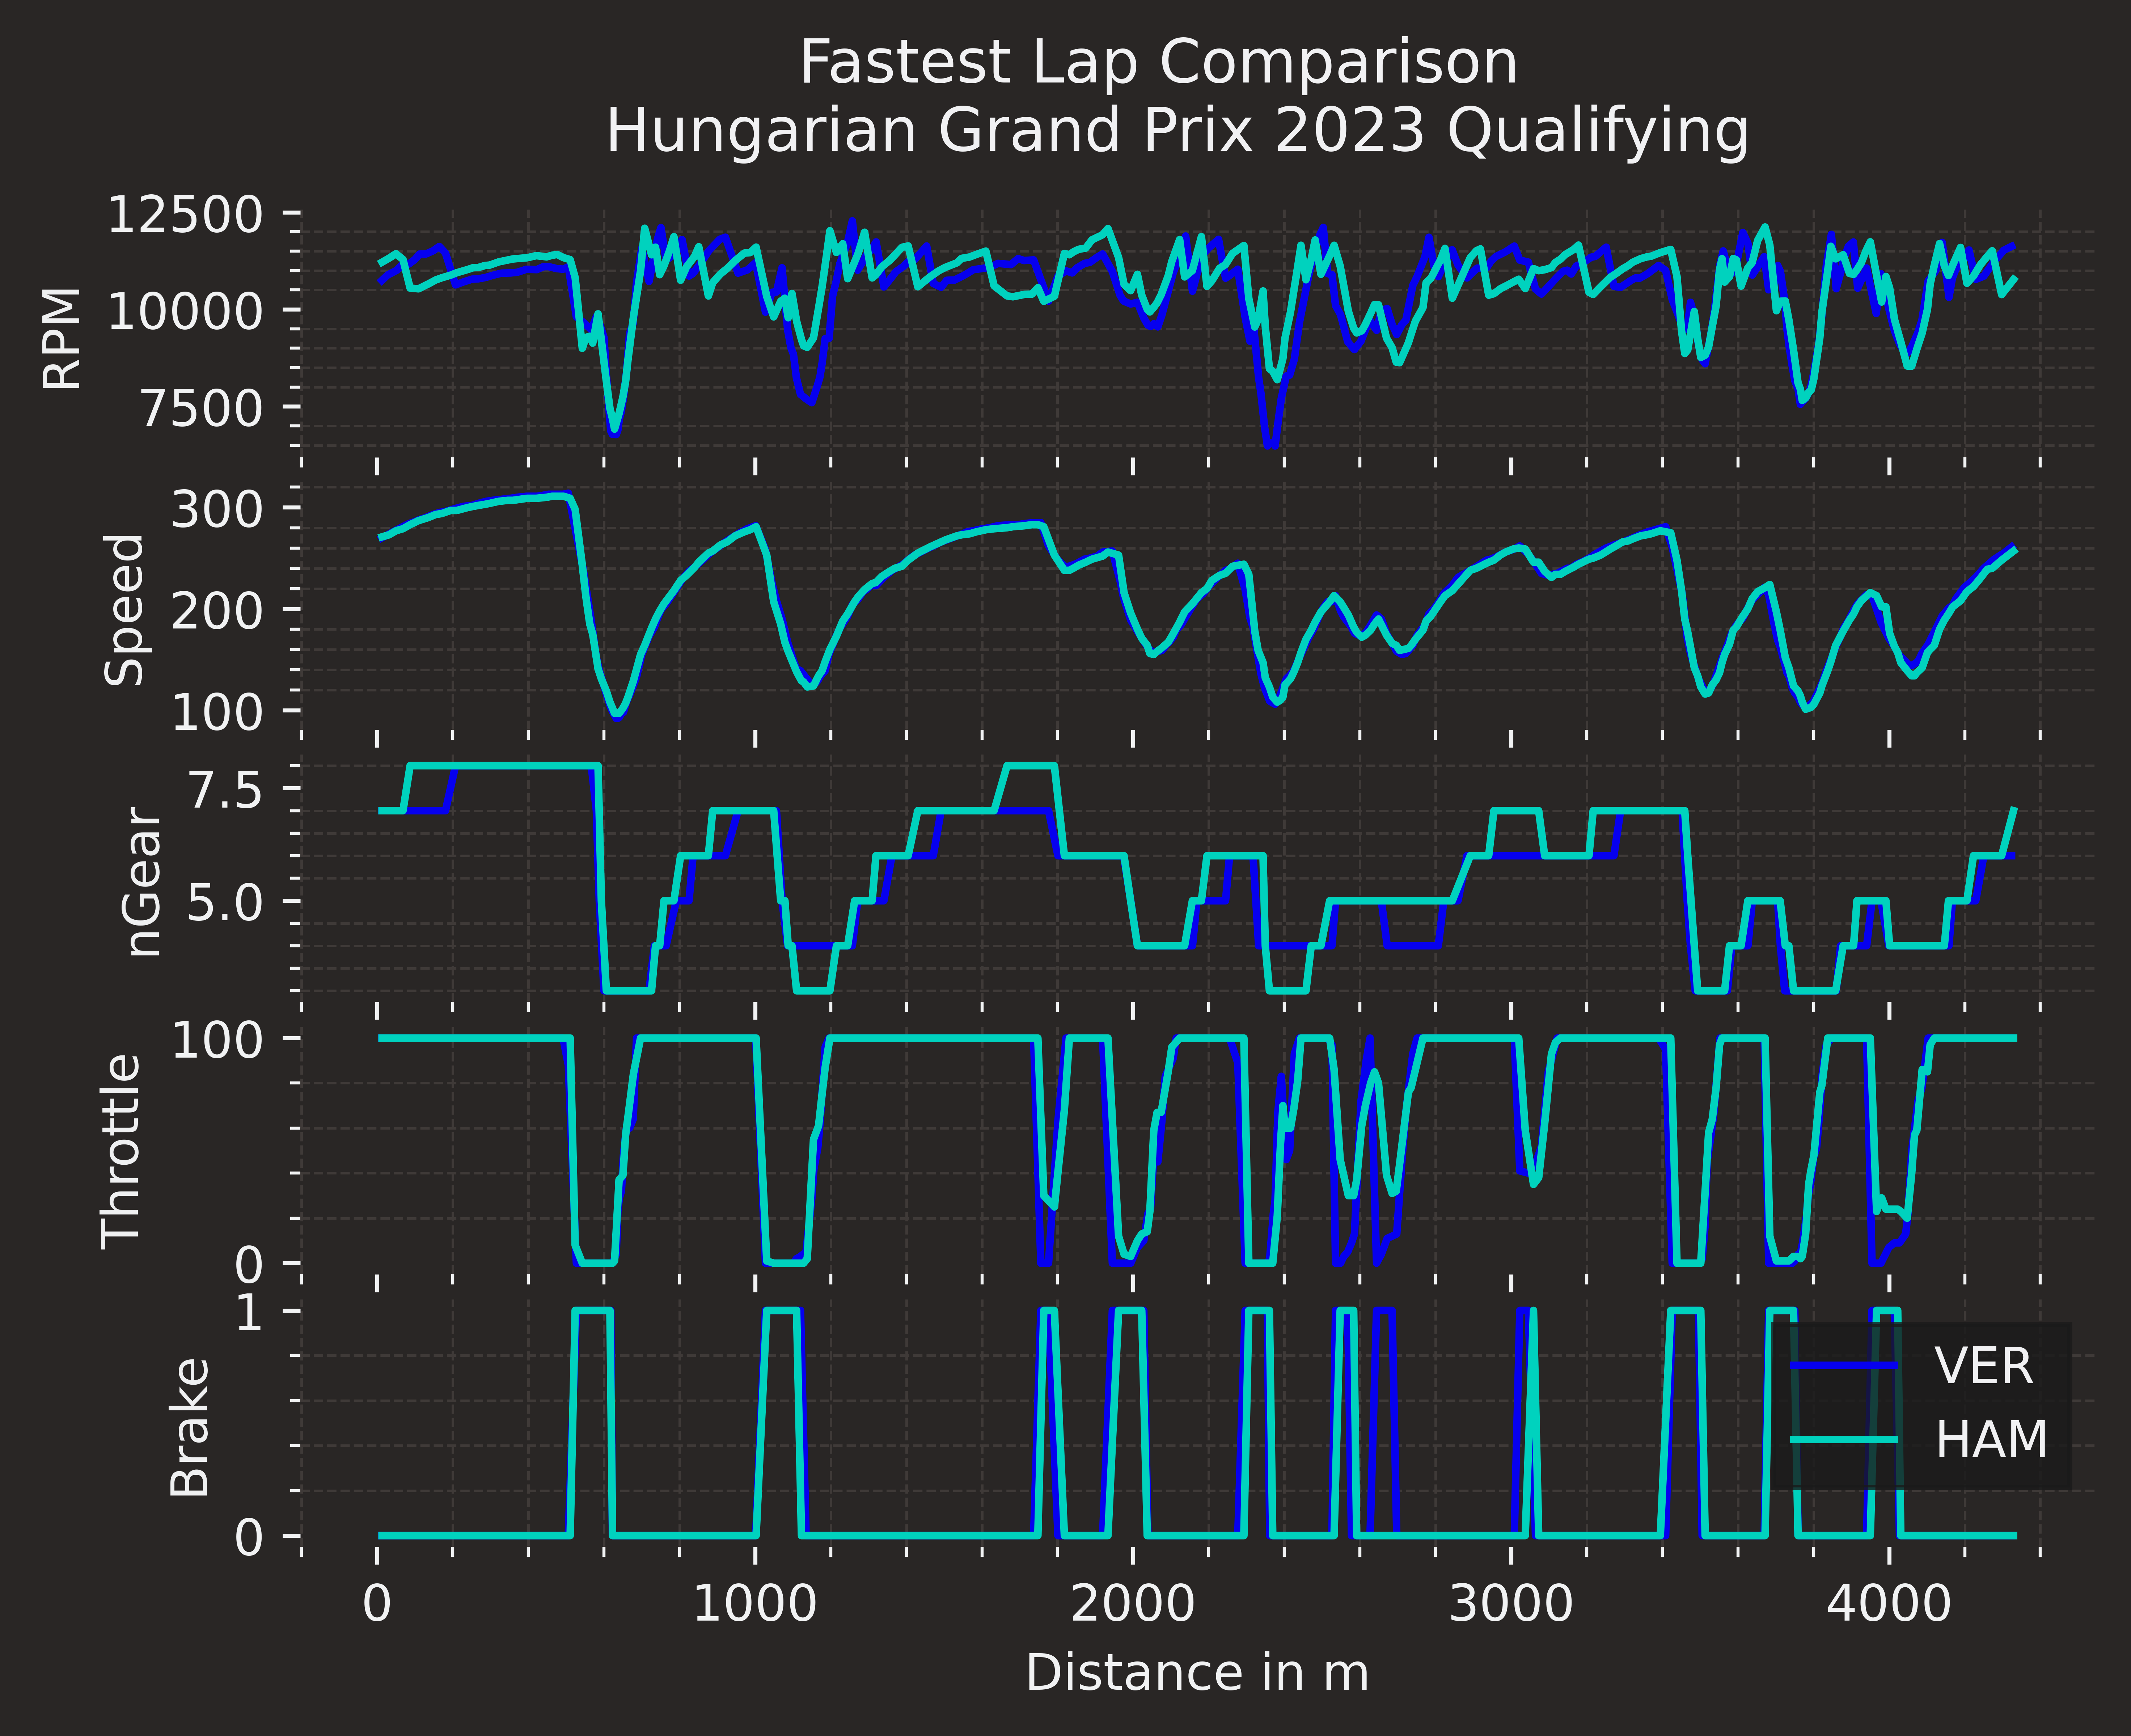

<Figure size 5e+06x5e+07 with 0 Axes>

In [6]:
attribute = ['RPM', 'Speed', 'nGear', 'Throttle', 'Brake']
drivers = ["VER", "HAM"]
driver_color = ["max verstappen", "lewis hamilton"]

fastestLapTelemetryComparison(session, "Qualifying", attribute, drivers, driver_color)